In [174]:
import pandas as pd
import numpy as np

In [175]:
# Load data
df = pd.read_excel('World Bank Data.xlsx')

df

,Country,GDP per capita (ppp)
0,Afghanistan,2083.321897
1,Albania,13974.011607
2,Algeria,11925.798564
3,Angola,7102.405887
4,Antigua and Barbuda,21630.179515
...,...,...
177,Vanuatu,3204.679541
178,Vietnam,7771.189420
179,West Bank and Gaza,6472.121785
180,Zambia,3607.304442


In [176]:
df['GDP per capita (ppp)'] = df['GDP per capita (ppp)'].astype(int)

df

,Country,GDP per capita (ppp)
0,Afghanistan,2083
1,Albania,13974
2,Algeria,11925
3,Angola,7102
4,Antigua and Barbuda,21630
...,...,...
177,Vanuatu,3204
178,Vietnam,7771
179,West Bank and Gaza,6472
180,Zambia,3607


In [177]:
# Summary statistics

df.describe()

,GDP per capita (ppp)
count,182.000000
mean,22485.109890
std,23724.538763
min,780.000000
25%,5158.250000
50%,13887.000000
75%,32366.000000
max,135121.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb179817550>]],
      dtype=object)

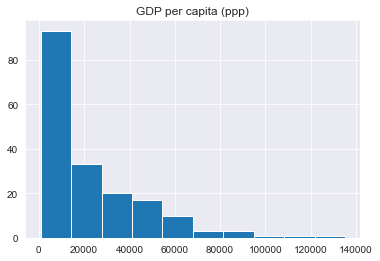

In [178]:
# Histogram

df.hist()

In [179]:
# If functions - two conditions

gdp = df['GDP per capita (ppp)']

df['Income group'] = np.where(gdp > 35000, 'High income', 'Low income')

df.head(10)

,Country,GDP per capita (ppp),Income group
0,Afghanistan,2083,Low income
1,Albania,13974,Low income
2,Algeria,11925,Low income
3,Angola,7102,Low income
4,Antigua and Barbuda,21630,Low income
5,Argentina,23313,Low income
6,Armenia,13024,Low income
7,Australia,51390,High income
8,Austria,58850,High income
9,Azerbaijan,14555,Low income


In [180]:
# If functions - multiple conditions

q3 = np.percentile(gdp, 75)
q1 = np.percentile(gdp, 25)

conditions = [
    gdp >= q3,
    np.logical_and(gdp >= q1, gdp < q3),
    gdp < q1
]

choices = ['High income', 'Middle income', 'Low income']

df['Income group'] = np.select(conditions, choices)

df

,Country,GDP per capita (ppp),Income group
0,Afghanistan,2083,Low income
1,Albania,13974,Middle income
2,Algeria,11925,Middle income
3,Angola,7102,Middle income
4,Antigua and Barbuda,21630,Middle income
...,...,...,...
177,Vanuatu,3204,Low income
178,Vietnam,7771,Middle income
179,West Bank and Gaza,6472,Middle income
180,Zambia,3607,Low income


In [181]:
# Vlookup

df2 = pd.read_excel('World Bank Data.xlsx', sheet_name='Life expectancy')

df2

,Country,Life expectancy
0,Afghanistan,64.486
1,Albania,78.458
2,Algeria,76.693
3,Angola,60.782
4,Antigua and Barbuda,76.885
...,...,...
177,Vanuatu,70.323
178,Vietnam,75.317
179,West Bank and Gaza,73.895
180,Zambia,63.510


In [182]:
df = pd.merge(df, df2, on='Country')

df

,Country,GDP per capita (ppp),Income group,Life expectancy
0,Afghanistan,2083,Low income,64.486
1,Albania,13974,Middle income,78.458
2,Algeria,11925,Middle income,76.693
3,Angola,7102,Middle income,60.782
4,Antigua and Barbuda,21630,Middle income,76.885
...,...,...,...,...
177,Vanuatu,3204,Low income,70.323
178,Vietnam,7771,Middle income,75.317
179,West Bank and Gaza,6472,Middle income,73.895
180,Zambia,3607,Low income,63.510


In [183]:
# Pivot table

table = df.groupby('Income group')['Life expectancy'].agg('mean')
table

Income group
High income      80.608405
Low income       63.817587
Middle income    73.040924
Name: Life expectancy, dtype: float64

In [184]:
# Make the table look nicer

table_df = pd.DataFrame(table)
table_df = table_df.round(1)
table_df.sort_values(by='Life expectancy', ascending=False)

,Life expectancy
Income group,
High income,80.6
Middle income,73.0
Low income,63.8


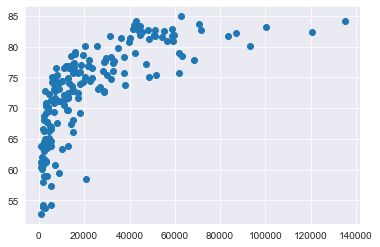

In [185]:
# Visualizing data

import matplotlib.pyplot as plt

plt.scatter(df['GDP per capita (ppp)'], df['Life expectancy'])

Text(0.5, 0, 'GDP per capita (PPP)')

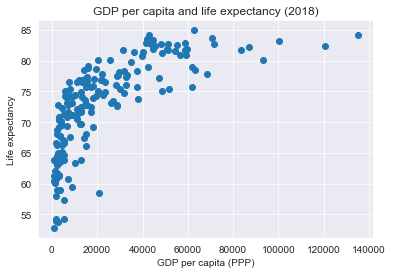

In [186]:
# Improving the visual

plt.scatter(df['GDP per capita (ppp)'], df['Life expectancy'])
plt.title('GDP per capita and life expectancy (2018)')
plt.ylabel('Life expectancy')
plt.xlabel('GDP per capita (PPP)')

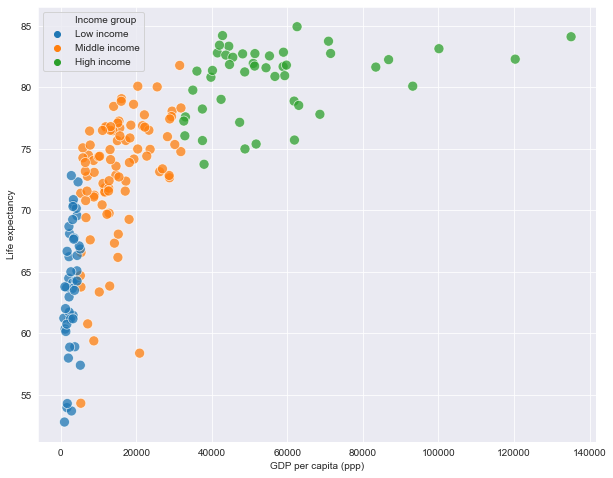

In [187]:
# Seaborn

import seaborn as sns 

sns.set_style(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='GDP per capita (ppp)', y='Life expectancy', data=df, hue='Income group', s=100, alpha=0.75)

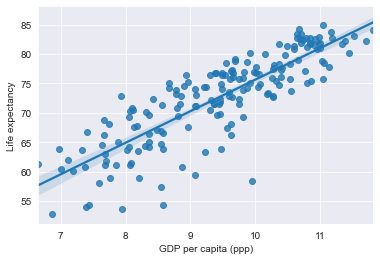

In [196]:
# Regplot

x = np.log(df['GDP per capita (ppp)'])
y = df['Life expectancy']

sns.regplot(x=x, y=y)